# **DATABASE AND SQL FOR DATA SCIENCE WITH PYTHON**

# **CHICAGO DATA ANALYSIS**

*By Anthony Chidiebere Udem*

Date: 7 June 2025

#Introduction

This course was structured to provide practical expertise in analysing data using SQL and Python two fundamental tools in data science today.

Through extensive hands-on labs and exercises, I have solidified my ability to write and optimise complex SQL queries, manage relational databases effectively, and conduct data analysis within Jupyter Notebooks.

# About the project: Chicago Data Analysis

A comprehensive analysis of real-world datasets from the City of Chicago, including CENSUS DATA, CHICAGO PUBLIC SCHOOLS, and CHICAGO CRIME DATA.

This project offered a realistic simulation of a data analyst's workflow, translating real-world questions into optimised SQL queries and deriving insights through structured data analysis and visualisation in Python.

# Key components / Objectives of the project


*   Create a database using SQLite and store the dataset as a table within it.

*   Querying and joining the three datasets to explore relationships between crime rates, school performance, and demographic information


*   Analysing data patterns using grouping, filtering, and subqueries to uncover correlations

*   Assessing data integrity and evaluating relational design across the datasets

*   Utilising nested queries and string pattern matching for detailed data extraction
*   Cleaning and transforming query results in Python using Pandas for further analysis


*   Presenting findings through structured SQL output and Python-generated visualisations


*   Validating results through systematic SQL testing



*  Perform exploratory data analysis (EDA) to investigate correlations in Chicago’s socio-economic dataset between:

1.  Per capita income and Hardship Index

1.   Per capita income and the percentage of households living below the poverty line
2.   Per capita income and the unemployment rate among individuals aged 16 and above.
























#Understanding the datasets
##The three datasets used in this project are available on the city of Chicago's Data Portal.


1.   Socioeconomic Indicators in Chicago
2.   Chicago Public Schools
1.   Chicago Crime Data


---



**Socioeconomic Indicators in Chicago**

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

**Chicago Public Schools**

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

**Chicago Crime Data**

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.


# NOTE
The dataset versions used here are subsets of the original datasets and have some of the column names modified to be more database friendly.

# Setup and Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv, sqlite3
%matplotlib inline
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [ ]:
# Loading the sqlite3 library and establish a connection to FinalDB.db database.
con = sqlite3.connect('FinalDB.db')
cur = con.cursor()

# Load the SQL magic module
%load_ext sql

# Establishing a connection between SQL magic module and the database FinalDB.db
%sql sqlite:///FinalDB.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


# Importing from drive and storing the datasets into SQLite DB database tables

In [ ]:
# importing the datasets from my github repo in a csv format
school = pd.read_csv('https://raw.githubusercontent.com/AnthonyUdem/chicago_data_analysis/main/ChicagoPublicSchools.csv')
crime = pd.read_csv('https://raw.githubusercontent.com/AnthonyUdem/chicago_data_analysis/main/ChicagoCrimeData.csv')
socio = pd.read_csv('https://raw.githubusercontent.com/AnthonyUdem/chicago_data_analysis/main/ChicagoCensusData.csv')


# storing the datasets into SQLite DB database tables
school.to_sql('ChicagoPublicSchools', con, if_exists='replace', index=False, method='multi')
crime.to_sql('ChicagoCrimeData', con, if_exists='replace', index=False, method='multi')
socio.to_sql('ChicagoCensusData', con, if_exists='replace', index=False, method='multi')

78

# Getting table info from the database

In [ ]:
#listing the names of tables available in the database
%sql SELECT NAME FROM SQLITE_MASTER WHERE TYPE = 'table';

 * sqlite:///FinalDB.db
Done.


name
ChicagoPublicSchools
ChicagoCrimeData
ChicagoCensusData


In [ ]:
#showing the column infomation of the Chicago Census Data table
%sql PRAGMA TABLE_INFO('ChicagoCensusData');

 * sqlite:///FinalDB.db
Done.


cid,name,type,notnull,dflt_value,pk
0,COMMUNITY_AREA_NUMBER,REAL,0,None,0
1,COMMUNITY_AREA_NAME,TEXT,0,None,0
2,PERCENT_OF_HOUSING_CROWDED,REAL,0,None,0
3,PERCENT_HOUSEHOLDS_BELOW_POVERTY,REAL,0,None,0
4,PERCENT_AGED_16__UNEMPLOYED,REAL,0,None,0
5,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,REAL,0,None,0
6,PERCENT_AGED_UNDER_18_OR_OVER_64,REAL,0,None,0
7,PER_CAPITA_INCOME,INTEGER,0,None,0
8,HARDSHIP_INDEX,REAL,0,None,0


In [ ]:
#showing the column infomation of the Chicago Public Schools table
%sql PRAGMA TABLE_INFO('ChicagoPublicSchools');

 * sqlite:///FinalDB.db
Done.


cid,name,type,notnull,dflt_value,pk
0,School_ID,INTEGER,0,None,0
1,NAME_OF_SCHOOL,TEXT,0,None,0
2,"Elementary, Middle, or High School",TEXT,0,None,0
3,Street_Address,TEXT,0,None,0
4,City,TEXT,0,None,0
5,State,TEXT,0,None,0
6,ZIP_Code,INTEGER,0,None,0
7,Phone_Number,TEXT,0,None,0
8,Link,TEXT,0,None,0
9,Network_Manager,TEXT,0,None,0


In [ ]:
#showing the column infomation of the Chicago Crime Data table
%sql PRAGMA TABLE_INFO('ChicagoCrimeData');

 * sqlite:///FinalDB.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,0
1,CASE_NUMBER,TEXT,0,None,0
2,DATE,TEXT,0,None,0
3,BLOCK,TEXT,0,None,0
4,IUCR,TEXT,0,None,0
5,PRIMARY_TYPE,TEXT,0,None,0
6,DESCRIPTION,TEXT,0,None,0
7,LOCATION_DESCRIPTION,TEXT,0,None,0
8,ARREST,INTEGER,0,None,0
9,DOMESTIC,INTEGER,0,None,0


In [ ]:
# displaying the frist 5 rows of the  Chicago Census Data table
%sql SELECT * FROM ChicagoCensusData LIMIT 5;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
# displaying the frist 5 rows of the Chicago Public Schools table
%sql SELECT * FROM ChicagoPublicSchools LIMIT 5;

 * sqlite:///FinalDB.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,Weak,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609993.pdf,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56.0,Average,44,Average,45.0,Weak,37.0,Weak,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,N

In [ ]:
# displaying the frist 5 rows of the Chicago Crime Data table
%sql SELECT * FROM ChicagoCrimeData LIMIT 5;

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,0,0,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,0,0,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.7734553,-87.70648047,"(41.773455295, -87.706480471)"


# Generating insights from tables

In [ ]:
# The total number of crimes recorded in the CRIME table.
%sql SELECT COUNT(*) AS crime_count FROM ChicagoCrimeData;

 * sqlite:///FinalDB.db
Done.


crime_count
533


In [ ]:
# Community area names and numbers with per capita income less than 11000.
%%sql
SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, PER_CAPITA_INCOME
FROM ChicagoCensusData
WHERE PER_CAPITA_INCOME < 11000;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,PER_CAPITA_INCOME
West Garfield Park,26.0,10934
South Lawndale,30.0,10402
Fuller Park,37.0,10432
Riverdale,54.0,8201


In [ ]:
# All case numbers for crimes involving minors (children are not considered minors for the purposes of crime analysis).

%%sql
SELECT CASE_NUMBER, DESCRIPTION, PRIMARY_TYPE
FROM ChicagoCrimeData
WHERE LOWER(DESCRIPTION) LIKE  '%minor%';

 * sqlite:///FinalDB.db
Done.


CASE_NUMBER,DESCRIPTION,PRIMARY_TYPE
HL266884,SELL/GIVE/DEL LIQUOR TO MINOR,LIQUOR LAW VIOLATION
HK238408,ILLEGAL CONSUMPTION BY MINOR,LIQUOR LAW VIOLATION


In [ ]:
# List of kidnapping crimes involving a child.
%%sql
SELECT * FROM ChicagoCrimeData
WHERE PRIMARY_TYPE = 'KIDNAPPING' AND  DESCRIPTION LIKE  '%CHILD%';

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


In [ ]:
# List of all kind of crimes that were recorded at schools with No repetitions.
%%sql
SELECT DISTINCT PRIMARY_TYPE
FROM ChicagoCrimeData
WHERE LOWER(LOCATION_DESCRIPTION) LIKE  '%school%';

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


In [ ]:
# Schools types along with the average safety score for each type.
%%sql
SELECT NAME_OF_SCHOOL, `Elementary, Middle, or High School`, AVG(SAFETY_SCORE)
FROM ChicagoPublicSchools
GROUP BY `Elementary, Middle, or High School`
;


 * sqlite:///FinalDB.db
Done.


NAME_OF_SCHOOL,"Elementary, Middle, or High School",AVG(SAFETY_SCORE)
Abraham Lincoln Elementary School,ES,49.52038369304557
Air Force Academy High School,HS,49.62352941176471
Albany Park Multicultural Academy,MS,48.0


In [ ]:
# 5 community areas with highest percentage of households below poverty line.
%%sql
SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY
FROM ChicagoCensusData ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


In [ ]:
# Community area number that's most crime prone.
%%sql
SELECT COMMUNITY_AREA_NUMBER FROM ChicagoCrimeData
WHERE COMMUNITY_AREA_NUMBER != 'None'
GROUP BY COMMUNITY_AREA_NUMBER
ORDER BY COUNT(*) DESC
LIMIT 1;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER
25.0


In [ ]:
# Community area with highest hardship index.
%%sql
SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM ChicagoCensusData
WHERE HARDSHIP_INDEX IN ( SELECT MAX(HARDSHIP_INDEX) FROM ChicagoCensusData);

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


In [ ]:
# Community Area Name with most number of crimes.
%%sql
SELECT COMMUNITY_AREA_NAME FROM ChicagoCensusData
WHERE COMMUNITY_AREA_NUMBER IN
(SELECT COMMUNITY_AREA_NUMBER FROM ChicagoCrimeData
WHERE COMMUNITY_AREA_NUMBER != 'None'
GROUP BY COMMUNITY_AREA_NUMBER
ORDER BY COUNT(*) DESC
LIMIT 1
);

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Austin


In [ ]:
# Number of community areas in Chicago that have hardship index greater than 50.0.
%sql SELECT COUNT(*) AS AREA_COUNT FROM ChicagoCensusData WHERE hardship_index > 50.0;

 * sqlite:///FinalDB.db
Done.


AREA_COUNT
38


In [ ]:
# Maximum value of hardship index in this dataset.
%sql SELECT MAX(hardship_index) AS MAX_HARDSHIP FROM ChicagoCensusData;

 * sqlite:///FinalDB.db
Done.


MAX_HARDSHIP
98.0


In [ ]:
# Community area with the highest hardship index.
%sql SELECT community_area_name FROM ChicagoCensusData WHERE hardship_index = 98.0;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Riverdale


In [ ]:
# Chicago community areas having per-capita incomes greater than $60,000.
%sql SELECT COMMUNITY_AREA_NAME FROM ChicagoCensusData WHERE PER_CAPITA_INCOME > 60000;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Lake View
Lincoln Park
Near North Side
Loop


# EXPLORATORY DATA ANALYSIS (EDA)

---
**Creating joint plots and explaining the correlation between variables.**



# EDA for Per capita income and Hardship index

In [ ]:
# querrying PER_CAPITA_INCOME and HARDSHIP_INDEX from the ChicagoCensusData table.
income_vs_hardship = %sql SELECT PER_CAPITA_INCOME, hardship_index FROM ChicagoCensusData;
income_vs_hardship = income_vs_hardship.DataFrame()

# displaying the first 5 rows of the data.
income_vs_hardship.head()

 * sqlite:///FinalDB.db
Done.


,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,23939,39.0
1,23040,46.0
2,35787,20.0
3,37524,17.0
4,57123,6.0


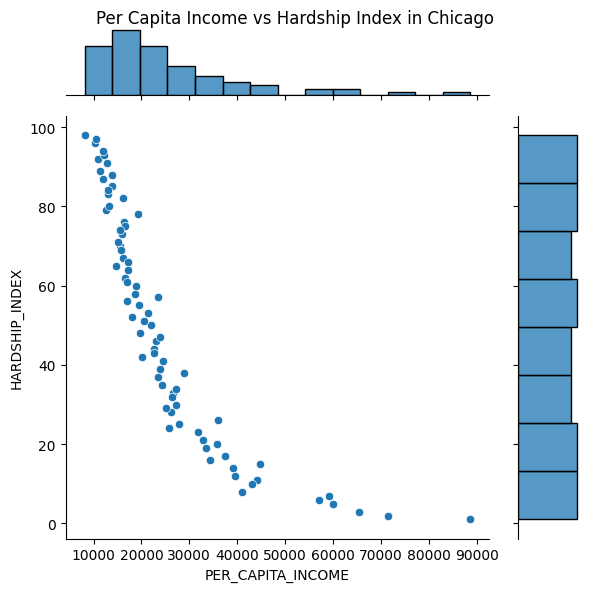

In [ ]:
# greating the jointplot.
plot = sns.jointplot(x= 'PER_CAPITA_INCOME', y= 'HARDSHIP_INDEX', data= income_vs_hardship)
plot.fig.suptitle('Per Capita Income vs Hardship Index in Chicago', fontsize=12)
plot.fig.tight_layout()  # Adjusts plot to fit the title
plot.fig.subplots_adjust(top=0.95)  # Moves the plot down slightly to make room for the title


*Correlation*.


1.   We can see that as Per Capita Income rises as the Hardship Index decreases.
2.   We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction
1.   So we have a negative correlation between the per capita income and the	hardship index of the socioeconomic data in Chicago City.

# EDA for Per capita income and Percent households below poverty.

In [ ]:
# querrying PER_CAPITA_INCOME and PERCENT_HOUSEHOLDS_BELOW_POVERTY from the ChicagoCensusData table.
income_vs_povertyHouseholds = %sql SELECT PER_CAPITA_INCOME, 	PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM ChicagoCensusData;
income_vs_povertyHouseholds = income_vs_povertyHouseholds.DataFrame();

# displaying the first 5 rows of the data.
income_vs_povertyHouseholds.head()

 * sqlite:///FinalDB.db
Done.


,PER_CAPITA_INCOME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
0,23939,23.6
1,23040,17.2
2,35787,24.0
3,37524,10.9
4,57123,7.5


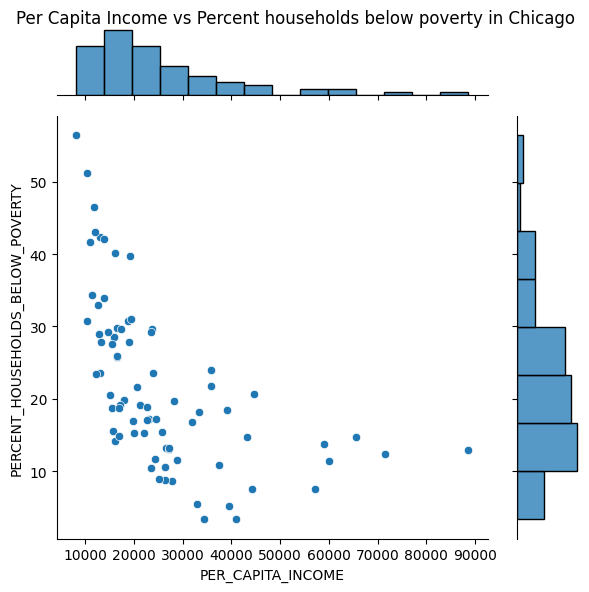

In [ ]:
# greating the jointplot.
plot = sns.jointplot(x= 'PER_CAPITA_INCOME', y= 'PERCENT_HOUSEHOLDS_BELOW_POVERTY', data= income_vs_povertyHouseholds)
plot.fig.suptitle('Per Capita Income vs Percent households below poverty in Chicago', fontsize=12)
plot.fig.tight_layout()  # Adjusts plot to fit the title
plot.fig.subplots_adjust(top=0.95)  # Moves the plot down slightly to make room for the title

*Correlation*.


- There is a negative correlation: higher per capita income generally associates with lower poverty rates.
- Most households with incomes around 10,000–30,000 have poverty rates between 20–50%.
- Poverty rates tend to decrease as income increases beyond 40,000.
- Even at higher income levels, some households still experience poverty.
- Variability exists within income groups, with some outliers showing high poverty percentages despite higher income.
- Overall, higher income usually correlates with lower household poverty, but exceptions exist.

# EDA for Per capita income and Percent aged 16 unemployed.

In [ ]:
# querrying PER_CAPITA_INCOME and PERCENT_AGED_16__UNEMPLOYED from the ChicagoCensusData table.
income_vs_unemployed16 = %sql SELECT PER_CAPITA_INCOME, PERCENT_AGED_16__UNEMPLOYED FROM ChicagoCensusData;
income_vs_unemployed16 = income_vs_unemployed16.DataFrame();

# displaying the first 5 rows of the data.
income_vs_unemployed16.head()

 * sqlite:///FinalDB.db
Done.


,PER_CAPITA_INCOME,PERCENT_AGED_16__UNEMPLOYED
0,23939,8.7
1,23040,8.8
2,35787,8.9
3,37524,8.2
4,57123,5.2


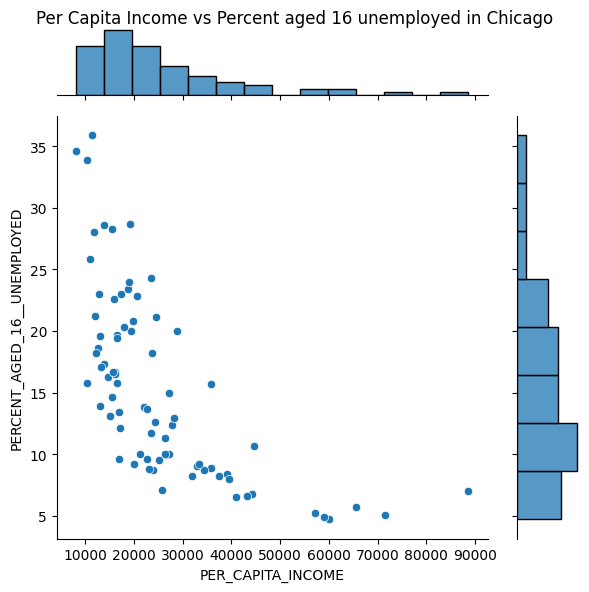

In [ ]:
# greating the jointplot.
plot = sns.jointplot(x= 'PER_CAPITA_INCOME', y= 'PERCENT_AGED_16__UNEMPLOYED', data= income_vs_unemployed16)
plot.fig.suptitle('Per Capita Income vs Percent aged 16 unemployed in Chicago', fontsize=12)
plot.fig.tight_layout()  # Adjusts plot to fit the title
plot.fig.subplots_adjust(top=0.95)  # Moves the plot down slightly to make room for the title

*Correlation*.



- Higher income generally means lower unemployment among 16-year-olds.
- Households with lower incomes (10,000–30,000) tend to have higher unemployment rates (about 10–35%).
- Unemployment drops as income goes above 40,000, nearing 5% or less.
- Most high unemployment rates are found in lower-income groups.
- Some households with higher income still have unemployment, but less frequently.
- Overall, more income usually means less youth unemployment.
- So we have a negative correlation between the per capita income and the  unemployment among 16-year-olds index of the socioeconomic data in Chicago City.

# Thank You!
Author: Anthony Chidiebere Udem

*Date: 7 June 2025*